## Loading and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

/Users/rachelliao/anaconda3/envs/ensemble/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load the dataset
df = pd.read_parquet('dataset/LoanData_after_DataCleaning.parquet')

## Assessment

In [3]:
# Print the shape of the data
df.shape

(21015, 29)

In [4]:
# # Print the first 5 rows of the dataset
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,Individual
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,Individual
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,Individual
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,Individual
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,Individual


In [5]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21015 entries, 0 to 22509
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            21015 non-null  float64
 1   funded_amnt          21015 non-null  float64
 2   funded_amnt_inv      21015 non-null  float64
 3   term                 21015 non-null  object 
 4   int_rate             21015 non-null  float64
 5   installment          21015 non-null  float64
 6   grade                21015 non-null  object 
 7   sub_grade            21015 non-null  object 
 8   emp_title            21015 non-null  object 
 9   emp_length           21015 non-null  object 
 10  home_ownership       21015 non-null  object 
 11  annual_inc           21015 non-null  float64
 12  verification_status  21015 non-null  object 
 13  loan_status          21015 non-null  object 
 14  purpose              21015 non-null  object 
 15  addr_state           21015 non-null 

In [6]:
# Get a statistical summary of the dataset
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,2.101500e+04,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000
mean,15247.552938,15247.552938,15241.224126,12.254598,441.629202,8.003775e+04,19.317213,0.338330,694.943850,698.943945,0.608232,12.226315,0.232072,17674.564454,51.906013,25.616227
std,8758.640338,8758.640338,8753.737831,4.210099,250.163947,6.237186e+04,8.766120,0.886337,31.055581,31.056042,0.889796,5.792745,0.639771,23093.748226,24.112053,12.192821
min,1000.000000,1000.000000,1000.000000,5.320000,30.540000,3.800000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,8000.000000,8000.000000,8000.000000,9.170000,258.700000,5.000000e+04,12.690000,0.000000,670.000000,674.000000,0.000000,8.000000,0.000000,6379.500000,33.900000,17.000000
50%,14000.000000,14000.000000,14000.000000,11.990000,384.920000,6.946000e+04,18.790000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,12074.000000,51.800000,24.000000
75%,20400.000000,20400.000000,20400.000000,14.480000,589.785000,9.600000e+04,25.560000,0.000000,710.000000,714.000000,1.000000,15.000000,0.000000,21499.000000,70.300000,32.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1354.660000,3.964280e+06,136.970000,15.000000,845.000000,850.000000,5.000000,65.000000,23.000000,647310.000000,134.300000,111.000000


## EDA

In [7]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


In [8]:
# Get the count of each unique value in 'loan_status' column
df['loan_status'].value_counts()

Fully Paid            14838
Charged Off            3711
Current                2285
Late (31-120 days)      116
In Grace Period          53
Late (16-30 days)        12
Name: loan_status, dtype: int64

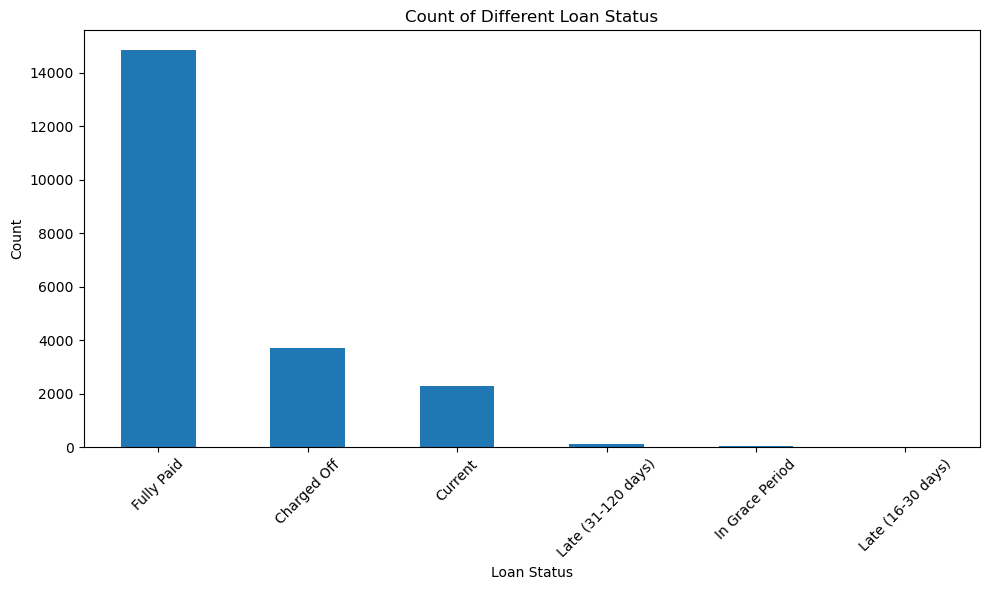

In [9]:
# Create a bar plot for the count of each unique value in 'loan_status' column
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [10]:
# Get the percentage of each unique value in 'loan_status' column
df['loan_status'].value_counts() / len(df) * 100

Fully Paid            70.606709
Charged Off           17.658815
Current               10.873186
Late (31-120 days)     0.551987
In Grace Period        0.252201
Late (16-30 days)      0.057102
Name: loan_status, dtype: float64

In [11]:
# Drop the rows with 'Late (16-30 days)', 'Late (31-120 days)', and 'In Grace Period' values in 'loan_status' column
df = df[df['loan_status'] != 'Late (16-30 days)']
df = df[df['loan_status'] != 'Late (31-120 days)']
df = df[df['loan_status'] != 'In Grace Period']

# Check the shape of the dataframe
df.shape

(20834, 29)

In [12]:
# Create a new DataFrame with modified loan_status values
df_modified = df.copy()
df_modified['loan_status'] = df_modified['loan_status'].replace(['Fully Paid', 'Current'], 'Paid')
df_modified['loan_status'] = df_modified['loan_status'].replace(['Charged Off'], 'Default')

# Show the first 5 rows of the modified DataFrame
df_modified.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,Individual
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,Individual
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,Individual
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,Individual
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,Individual


In [13]:
# Get the count of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts()

Paid       17123
Default     3711
Name: loan_status, dtype: int64

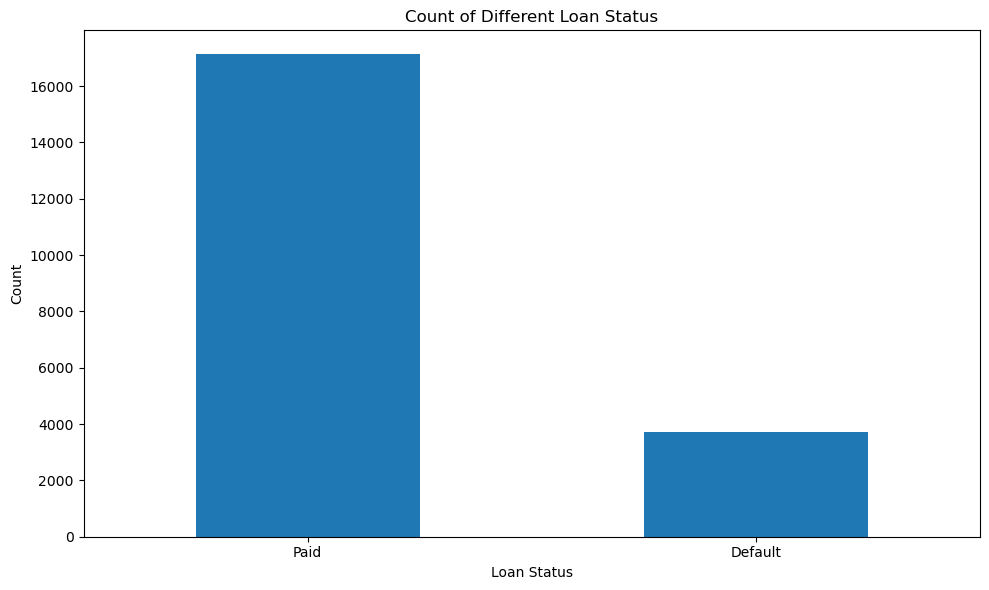

In [14]:
# Create a bar plot for count of values in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
df_modified['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Get the percentage of each unique value in 'loan_status' column
df_modified['loan_status'].value_counts() / len(df_modified) * 100

Paid       82.18777
Default    17.81223
Name: loan_status, dtype: float64

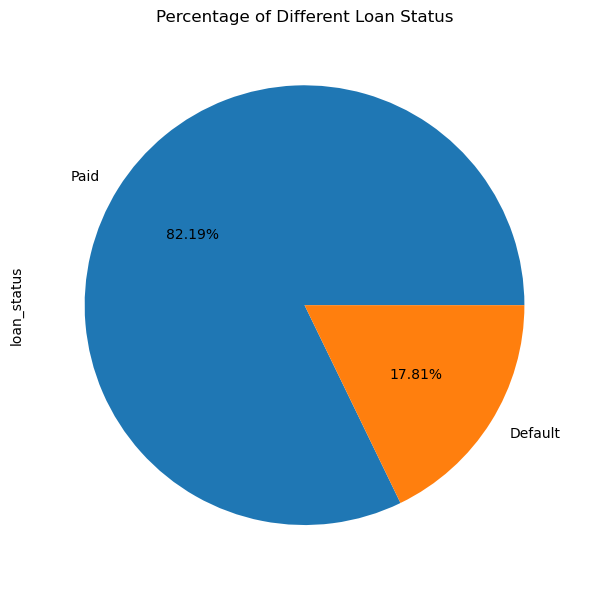

In [16]:
# Create a pie chart for the percentage of each unique value in the modified 'loan_status' column
plt.figure(figsize=(10, 6))
loan_status_counts = df_modified['loan_status'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage of Different Loan Status')
plt.tight_layout()
plt.show()

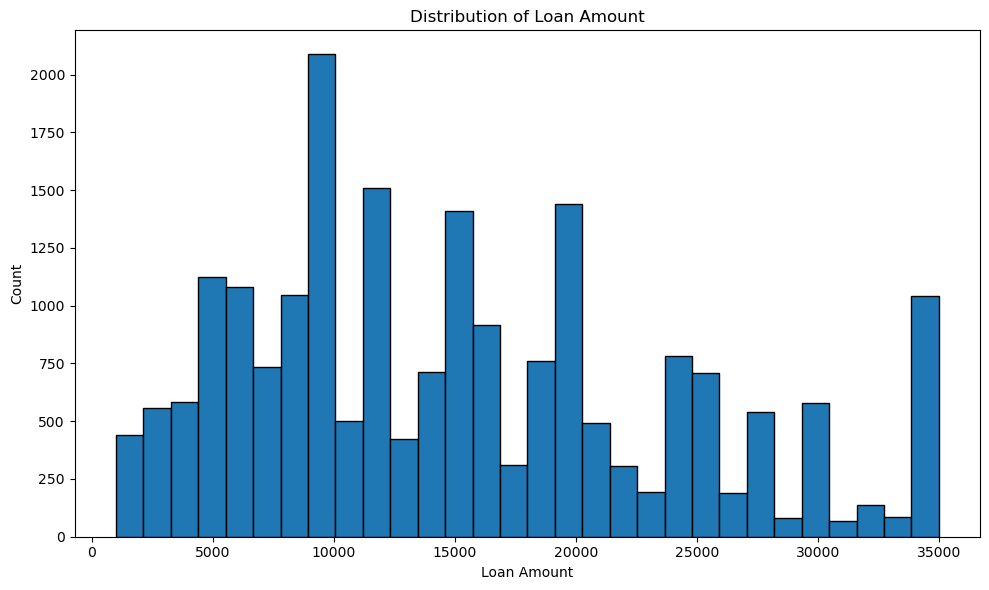

In [17]:
# Plot a histogram for the 'loan_amnt' column
plt.figure(figsize=(10, 6))
plt.hist(df_modified['loan_amnt'], bins=30, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()

The histogram shows the distribution of loan amounts in the dataset: 
- Most of the loans are in the range of $5,000 to $20,000.

### emp_length feature

Let's plot the emp_length feature column.

In [18]:
sorted(df_modified['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

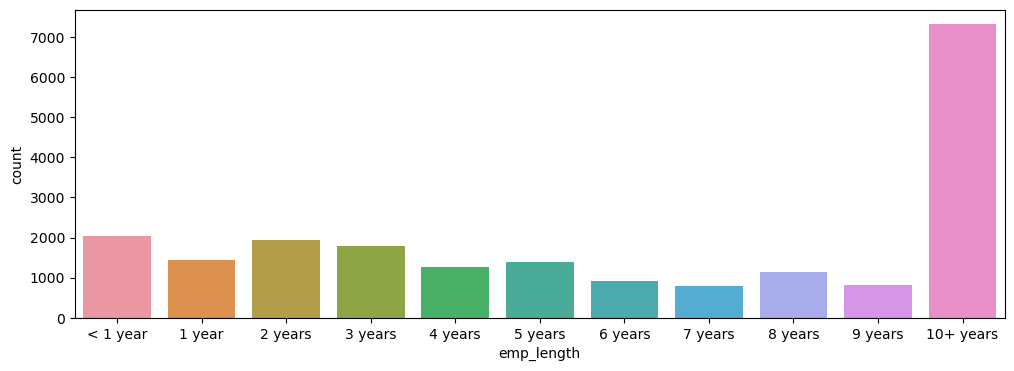

In [19]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

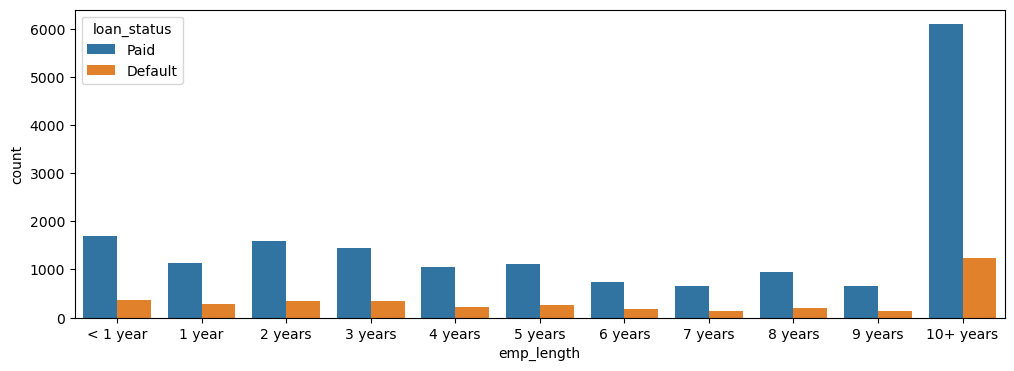

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df_modified,order=emp_length_order,hue='loan_status')

Let's further visualize what percent of people per employment category didn't pay back their loan.

In [21]:
emp_default = df_modified[df_modified['loan_status']=="Default"].groupby("emp_length").count()['loan_status']

emp_paid = df_modified[df_modified['loan_status']=="Paid"].groupby("emp_length").count()['loan_status']

emp_len = emp_default/emp_paid

emp_len

emp_length
1 year       0.254593
10+ years    0.203087
2 years      0.215760
3 years      0.234525
4 years      0.210930
5 years      0.241472
6 years      0.229620
7 years      0.192424
8 years      0.219851
9 years      0.220365
< 1 year     0.213863
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

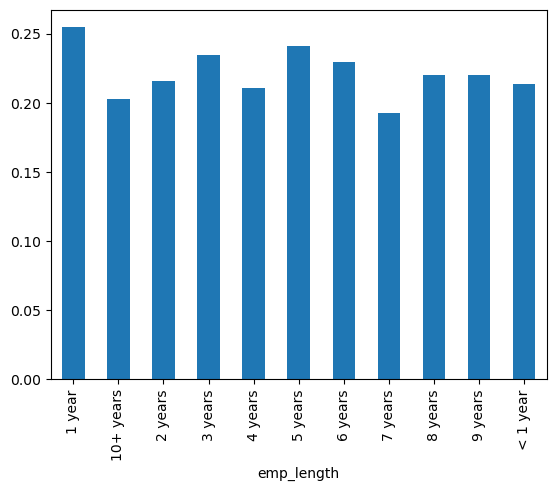

In [22]:
emp_len.plot(kind='bar')

However, as we can see, the default rates are not much different across all employment lengths. Therefore, let's drop the emp_length column.

In [23]:
df_modified = df_modified.drop('emp_length',axis=1)

In [24]:
# Save the data to a parquet file
df_modified.to_parquet('dataset/LoanData_after_EDA.parquet')